## Report PSNR, SSIM, MSE scores

In [71]:
gt_dir = "dhazy/Middlebury_GT"
output_dir = "dhazy/Middlebury_Hazy_reshaped_dehazed"

In [72]:
import os

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage import io, transform
import matplotlib.pyplot as plt

In [73]:
# collect names
fnames = []

for f in sorted(os.listdir(output_dir)):
    fnames.append(f)

In [64]:
# fnames = []
# with open("dhazy/NYU_split/test_Hazy.txt") as f:
#     for line in f.readlines():
#         fnames.append(os.path.split(line.strip())[1])
#         assert os.path.isfile(line.strip())

In [75]:
# compute the metrics
psnrs, ssims, mses = [], [], []

for f in fnames:
    
    img_gt = io.imread(os.path.join(gt_dir, f.replace("_Hazy.bmp", "_im0.png")))
    img_out = io.imread(os.path.join(output_dir, f))/255
    
    img_gt = transform.resize(img_gt, (img_out.shape[0], img_out.shape[1]))
   
    psnrs.append(psnr(img_gt, img_out))
    mses.append(mse(img_gt, img_out))
    ssims.append(ssim(img_gt, img_out, multichannel=True))

In [76]:
def get_histogram(values, metric):
    
    # Create the histogram plot
    plt.hist(values, bins='auto')

    # Set the title and labels
    plt.xlabel(f"{metric} values")
    plt.ylabel("Frequency")

    # Display the plot
    plt.show()

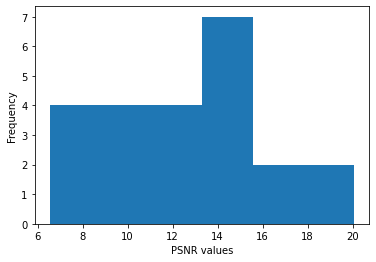

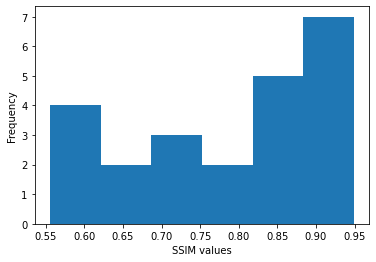

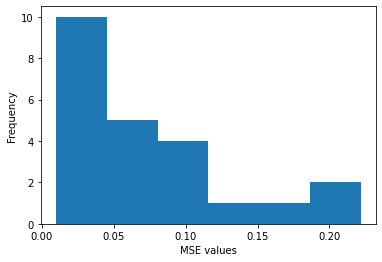

Avg. PSNR: 12.737036659071165
Avg. SSIM: 0.7841313518854368
Avg. MSE: 0.07279888796476608


In [77]:
# visualize metrics

get_histogram(psnrs, "PSNR")
get_histogram(ssims, "SSIM")
get_histogram(mses, "MSE")

print(f"Avg. PSNR: {np.mean(psnrs)}")
print(f"Avg. SSIM: {np.mean(ssims)}")
print(f"Avg. MSE: {np.mean(mses)}")

In [78]:
print(len(psnrs))


23
